In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
from keras.models import Sequential

In [3]:
dataset=pd.read_excel('Features_2500RPM_60dB.xlsx')
dataset.shape

(3500, 99)

In [4]:
x = dataset.iloc[:,:-14].values
y14 = dataset.iloc[:,-1].values
y4 = dataset.iloc[:,-2].values

In [5]:
x.shape

(3500, 85)

In [6]:
labels=np.unique(y4)
labels

array(['Compression Ratio Reduction in Cylinders', 'Normal',
       'Pressure Reduction In Intake Manifold',
       'Reduction in Amount of Fuel Injected into Cylinders'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:
y4=lb.fit_transform(y4)
y4

array([1, 1, 1, ..., 3, 3, 3])

In [9]:
y4.shape


(3500,)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y4,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
model=tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))

In [14]:
model.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

In [15]:
model.compile(optimizer='adam', loss="SparseCategoricalCrossentropy", metrics=['accuracy'])

In [16]:
y_test.shape

(700,)

In [17]:
x_train.shape

(2800, 85)

In [18]:
y_train

array([0, 0, 3, ..., 0, 3, 3])

In [19]:
x_test.shape

(700, 85)

In [20]:
ann2=model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size = 32, epochs = 20)

Epoch 1/20
88/88 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.8089 - val_loss: 0.2619 - val_accuracy: 0.9014
Epoch 2/20
88/88 [==============================] - 0s 619us/step - loss: 0.2268 - accuracy: 0.9107 - val_loss: 0.1913 - val_accuracy: 0.9100
Epoch 3/20
88/88 [==============================] - 0s 585us/step - loss: 0.1792 - accuracy: 0.9407 - val_loss: 0.1524 - val_accuracy: 0.9871
Epoch 4/20
88/88 [==============================] - 0s 608us/step - loss: 0.1548 - accuracy: 0.9579 - val_loss: 0.1358 - val_accuracy: 0.9457
Epoch 5/20
88/88 [==============================] - 0s 608us/step - loss: 0.1352 - accuracy: 0.9657 - val_loss: 0.1168 - val_accuracy: 0.9671
Epoch 6/20
88/88 [==============================] - 0s 608us/step - loss: 0.1194 - accuracy: 0.9661 - val_loss: 0.1003 - val_accuracy: 0.9786
Epoch 7/20
88/88 [==============================] - 0s 619us/step - loss: 0.1054 - accuracy: 0.9757 - val_loss: 0.0888 - val_accuracy: 0.9814
Epoch 8/

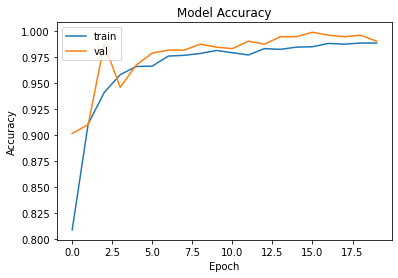

In [21]:
plt.plot(ann2.history['accuracy'])
plt.plot(ann2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

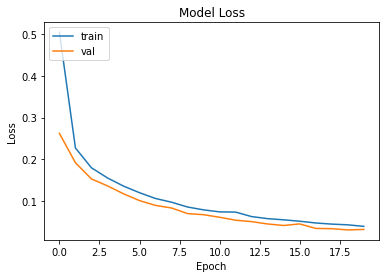

In [22]:
plt.plot(ann2.history['loss'])
plt.plot(ann2.history['val_loss'])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred = (y_pred>0.5)
y_pred = 1*y_pred
y_pred

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
cm

array([[292,   0,   0,   0],
       [  0,  50,   0,   0],
       [  1,   0,  52,   0],
       [  1,   6,   0, 298]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

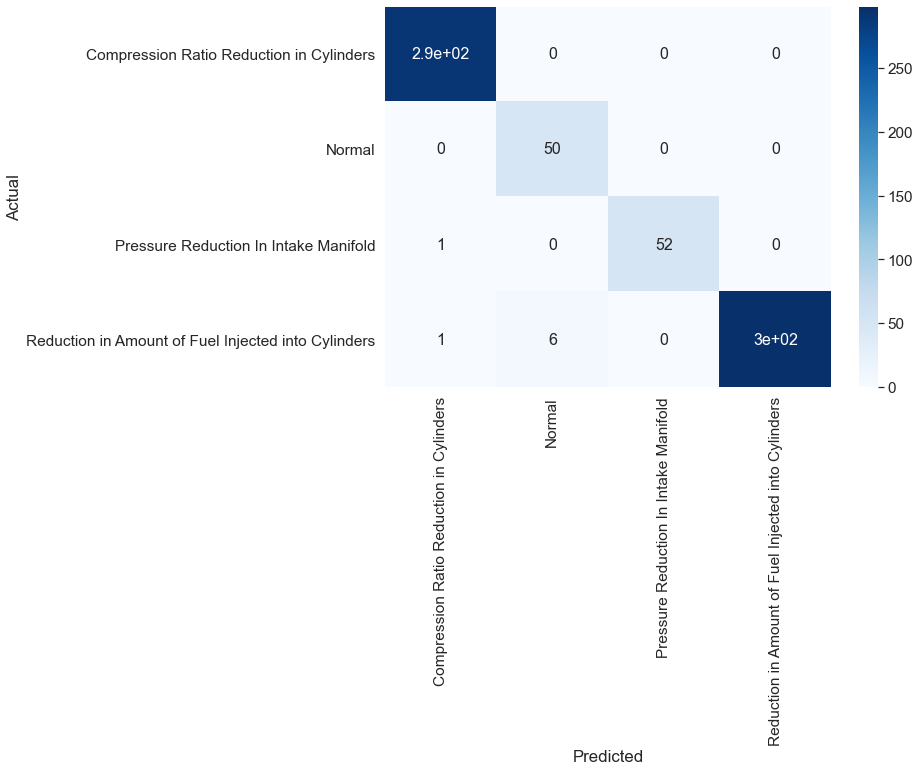

In [26]:
df_cm = pd.DataFrame(cm, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       292
           1       0.89      1.00      0.94        50
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99       305

    accuracy                           0.99       700
   macro avg       0.97      0.99      0.98       700
weighted avg       0.99      0.99      0.99       700



### 14-CLASS

In [28]:
labels2=np.unique(y14)
labels2

array(['Compression Ratio Reduction - C1',
       'Compression Ratio Reduction - C2',
       'Compression Ratio Reduction - C3',
       'Compression Ratio Reduction - C4',
       'Compression Ratio Reduction - C5',
       'Compression Ratio Reduction - C6', 'Normal',
       'Pressure Reduction In Intake Manifold',
       'Reduction In Fuel Injected - C1',
       'Reduction In Fuel Injected - C2',
       'Reduction In Fuel Injected - C3',
       'Reduction In Fuel Injected - C4',
       'Reduction In Fuel Injected - C5',
       'Reduction In Fuel Injected - C6'], dtype=object)

In [29]:
y14=lb.fit_transform(y14)
y14.shape

(3500,)

In [30]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y14,test_size=0.2,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [32]:
model2=tf.keras.models.Sequential()

In [33]:
model2.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))

In [34]:
model2.add(tf.keras.layers.Dense(units = 14, activation = 'softmax'))

In [35]:
model2.compile(optimizer='adam', loss="SparseCategoricalCrossentropy", metrics=['accuracy'])

In [36]:
ann3=model2.fit(x_train2,y_train2,validation_data=(x_test2,y_test2), batch_size = 32, epochs = 20)

Epoch 1/20
88/88 [==============================] - 0s 2ms/step - loss: 1.1810 - accuracy: 0.7568 - val_loss: 0.5055 - val_accuracy: 0.8971
Epoch 2/20
88/88 [==============================] - 0s 608us/step - loss: 0.4229 - accuracy: 0.9096 - val_loss: 0.3325 - val_accuracy: 0.9314
Epoch 3/20
88/88 [==============================] - 0s 619us/step - loss: 0.3093 - accuracy: 0.9221 - val_loss: 0.2560 - val_accuracy: 0.9371
Epoch 4/20
88/88 [==============================] - 0s 642us/step - loss: 0.2520 - accuracy: 0.9339 - val_loss: 0.2133 - val_accuracy: 0.9457
Epoch 5/20
88/88 [==============================] - 0s 630us/step - loss: 0.2177 - accuracy: 0.9425 - val_loss: 0.1806 - val_accuracy: 0.9600
Epoch 6/20
88/88 [==============================] - 0s 630us/step - loss: 0.1898 - accuracy: 0.9486 - val_loss: 0.1671 - val_accuracy: 0.9700
Epoch 7/20
88/88 [==============================] - 0s 631us/step - loss: 0.1711 - accuracy: 0.9554 - val_loss: 0.1420 - val_accuracy: 0.9671
Epoch 8/

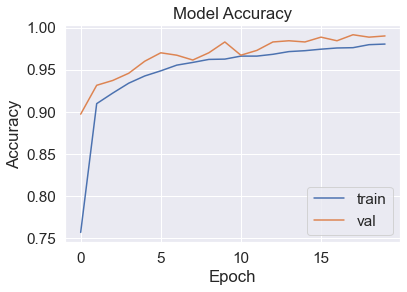

In [37]:
plt.plot(ann3.history['accuracy'])
plt.plot(ann3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

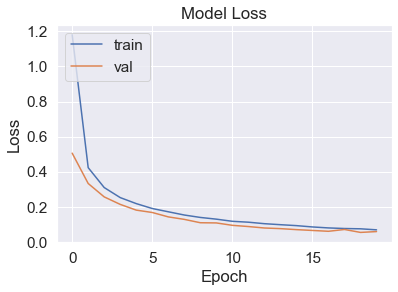

In [38]:
plt.plot(ann3.history['loss'])
plt.plot(ann3.history['val_loss'])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
y_pred2 = model2.predict(x_test2)
y_pred2=(y_pred2>0.5)
y_pred2 = 1*y_pred2
y_pred2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [40]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2, y_pred2.argmax(axis=1))
cm2

array([[66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  3,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 53]],
      dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

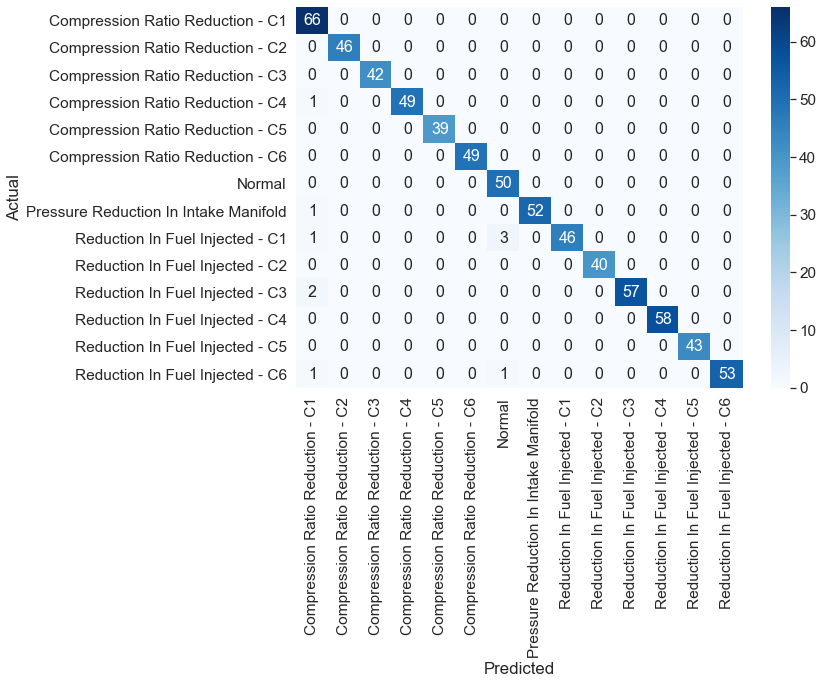

In [41]:
df_cm = pd.DataFrame(cm2, columns=labels2, index =labels2)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def my_classifier():
    classifier = Sequential()

    classifier.add(Dense(
    units = 84,
    activation="relu"
    ))

    classifier.add(Dense(
        units = 4,
        activation="softmax"
        ))


    classifier.compile(
        optimizer = "adam",
        loss="SparseCategoricalCrossentropy",
        metrics=['accuracy']
        )

    return classifier

#this classifier will be use to the 10 different training fold 
#for k-cross validation on 1 test fold
classifier = KerasClassifier(build_fn = my_classifier,
                             batch_size = 32,
                             nb_epoch = 20)

accuracies = cross_val_score(
        estimator=classifier,
        X = x_train,
        y = y_train,
        cv=5
        )
#the important variable is cv which mean the number of
#fold in cross validation that we will use

#after we got the accuracies, find the mean
mean = accuracies.mean()
variance = accuracies.std()

18/18 [==============================] - 0s 469us/step - loss: 0.3055 - accuracy: 0.9054


In [45]:
std = np.sqrt(variance)
std

0.13402969910087373

In [46]:
mean

0.887500011920929

In [47]:
variance

0.01796396024107075